# Insurance Charges Prediction Using Linear Regression
# This script explores and visualizes the dataset before training,
# checks for linear relationships, trains a Linear Regression model,
# and evaluates the predictions with appropriate visualizations.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

### Load dataset
### The dataset contains information about insurance charges and related features.

In [32]:
data = pd.read_csv('insurance.csv')

### Display the first few rows of the dataset


In [33]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### Display basic statistics


In [34]:
print("\nDataset Summary:")
print(data.describe())


Dataset Summary:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Visualizing feature distributions before training


<Figure size 1200x600 with 0 Axes>

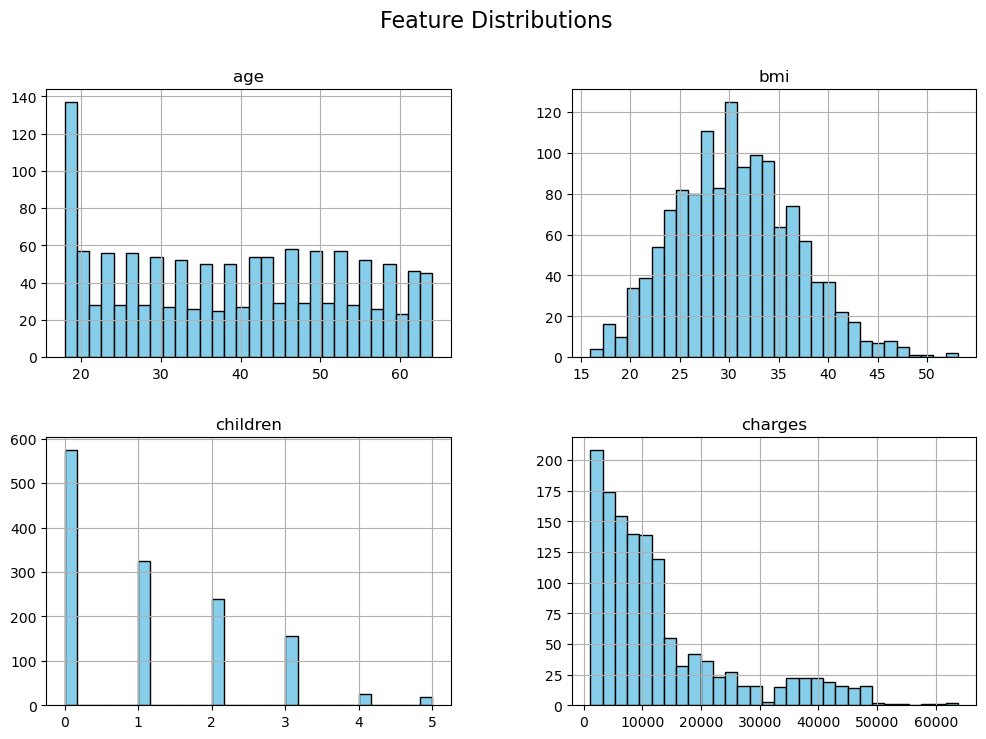

In [35]:
plt.figure(figsize=(12, 6))
data.hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


### Encoding categorical features
### Convert categorical columns ('sex', 'smoker', 'region') into numerical values using one-hot encoding.

In [36]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)


### Visualizing relationships before training
### Generate a heatmap to display correlations between features.

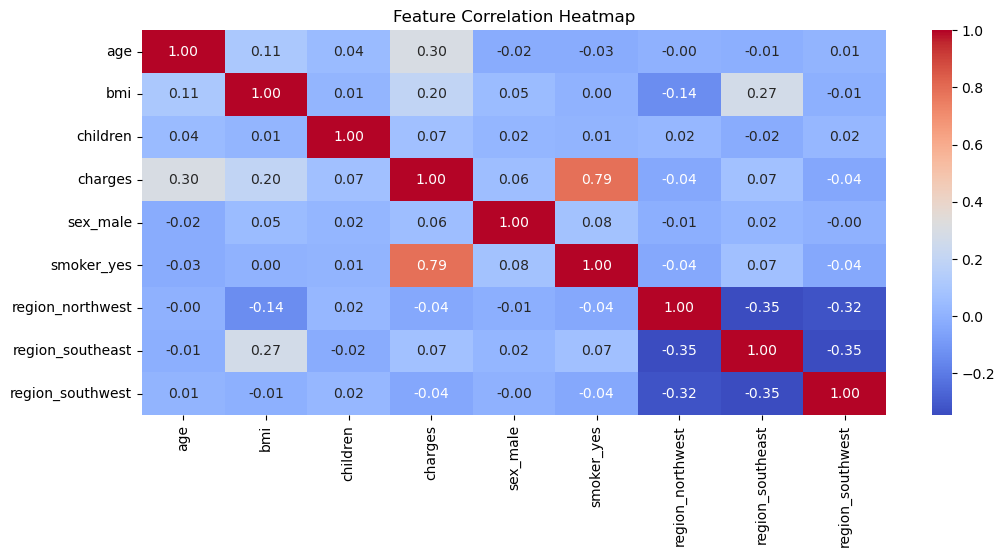

In [37]:
plt.figure(figsize=(12, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

### Checking linear relationship using Pearson correlation with target variable


In [38]:
correlations = data.corr()['charges'].drop('charges')
print("\nFeature Correlation with Target (charges):")
print(correlations)


Feature Correlation with Target (charges):
age                 0.299008
bmi                 0.198341
children            0.067998
sex_male            0.057292
smoker_yes          0.787251
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64


### Scatter plots to check linearity between features and target variable


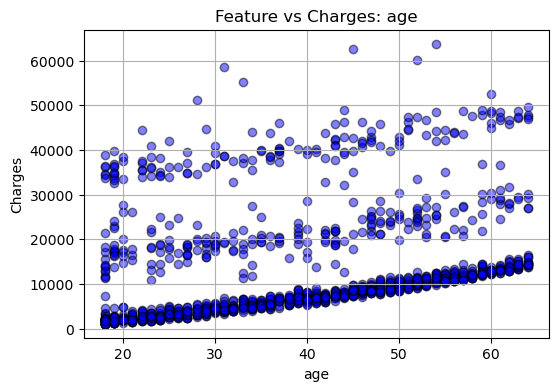

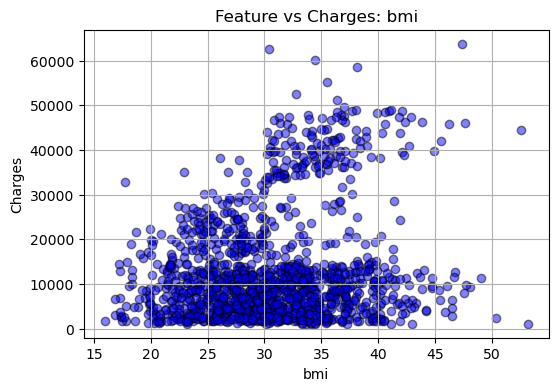

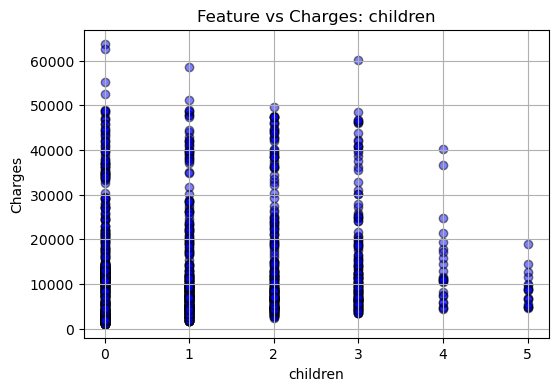

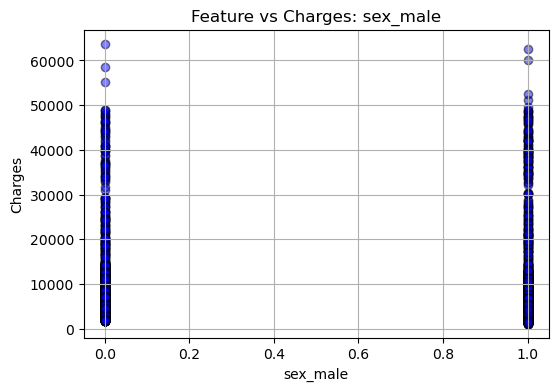

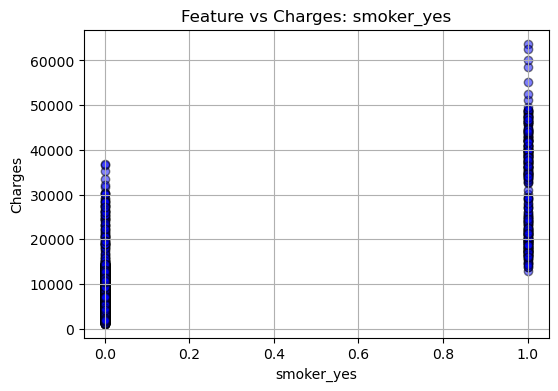

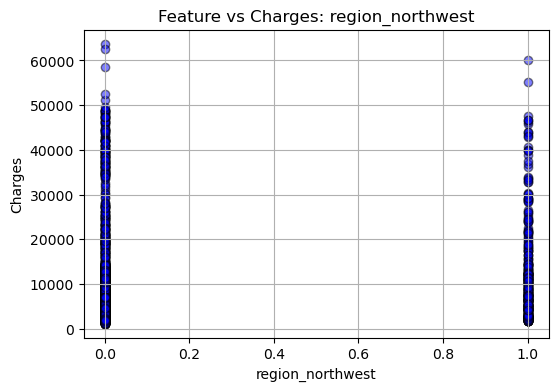

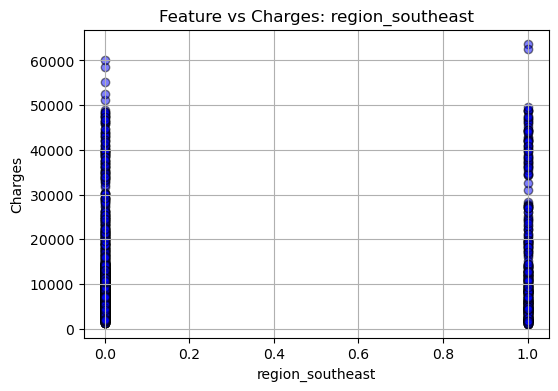

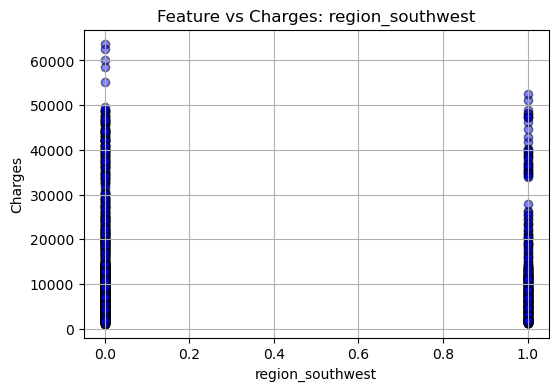

In [39]:
for column in data.drop(columns=['charges']).columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[column], data['charges'], alpha=0.5, color='blue', edgecolors='k')
    plt.xlabel(column)
    plt.ylabel('Charges')
    plt.title(f'Feature vs Charges: {column}')
    plt.grid(True)
    plt.show()


### Splitting data into training and testing sets
### The target variable is 'charges', and the remaining columns are used as features.

In [40]:
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

### Feature scaling


In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model training
### Using Linear Regression to predict insurance charges if correlation suggests a linear relationship.

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

### Model evaluation
### Calculate and display the Mean Squared Error (MSE) of the predictions.

In [44]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 32294273.62


### Applying Polynomial Regression


In [45]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [46]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression MSE: {poly_mse:.2f}")

Polynomial Regression MSE: 20425513.97


### Applying Ridge Regression

In [47]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {ridge_mse:.2f}")

Ridge Regression MSE: 32289427.18


### Scatter plot comparing actual vs predicted values with a reference line.

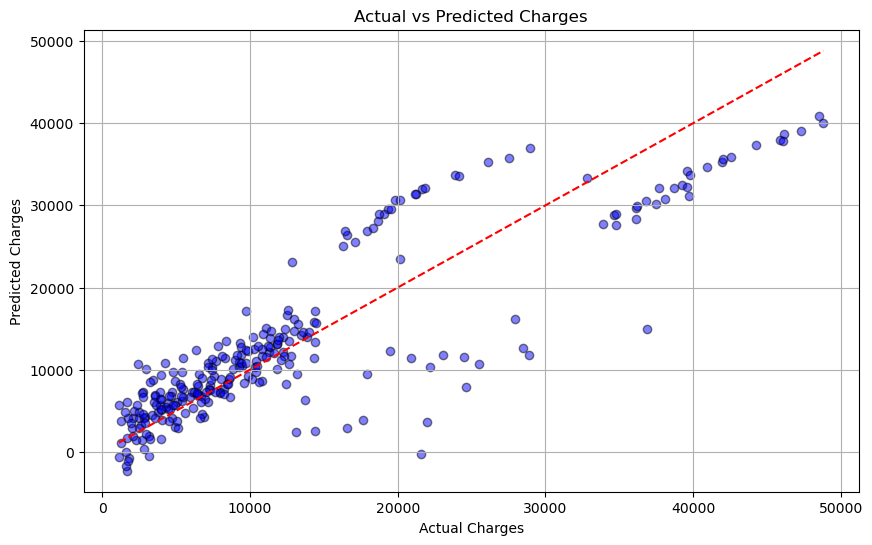

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.grid(True)
plt.show()


### Line plot to visualize actual vs predicted charges over index.

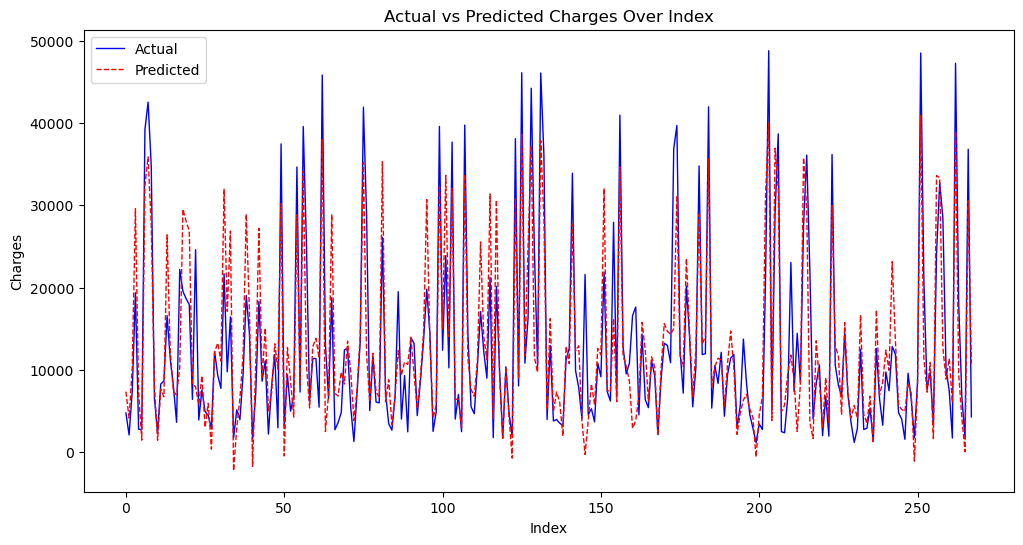

In [49]:
plt.figure(figsize=(12, 6))
c = np.arange(len(y_test))
plt.plot(c, y_test.values, color='blue', linewidth=1, linestyle='-', label='Actual')
plt.plot(c, y_pred, color='red', linewidth=1, linestyle='--', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.title('Actual vs Predicted Charges Over Index')
plt.legend()
plt.show()